# letter-recognition

In [1]:
# Import required libraries

import pandas as pd
import numpy as np

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandasql as psql

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
#from itertools import cycle

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#from scipy import interp


# Ignore warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the letter recognition dataset

lettersdata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\51 season Multinomial Classifier 02-Aug-2021\letter-recognition.csv",header=0)
lettersdata.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# Display the dataset information

lettersdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
# Get the sub set of data for letters A,B, P & R

lettersdata_N = psql.sqldf("select * \
                            from lettersdata \
                            where letter in ('A', 'B', 'P' , 'R')")

lettersdata_N.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
1,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
2,R,5,9,5,7,6,6,11,7,3,7,3,9,2,7,5,11
3,B,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
4,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8


In [5]:
# Display the count of each letter

lettersdata_N['letter'].value_counts(sort=False)

A    789
R    758
P    803
B    766
Name: letter, dtype: int64

In [6]:
# Identify the dependent and Target variables

IndepVar = []
for col in lettersdata_N.columns:
    if col != 'letter':
        IndepVar.append(col)

TargetVar = 'letter'

x = lettersdata_N[IndepVar]
y = lettersdata_N[TargetVar]

In [7]:
# Impoert LabelEncoder and convert the target variable from objectto integer values

from sklearn import preprocessing

# creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers

y = le.fit_transform(y)
y = pd.DataFrame(y)

In [8]:
# Display the target values after LabelEncoder

y.value_counts(sort=False)

0    789
1    766
2    803
3    758
dtype: int64

In [9]:
# Split the dataset into train and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)
x_test_F1 = x_test.copy()

In [10]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression
from math import sqrt

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                            intercept_scaling=1, max_iter=100, multi_class='auto',
                            n_jobs=None, penalty='l2', random_state=None,
                            solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y1_pred = modelLR.predict(x_test)
y1_pred_proba = modelLR.predict_proba(x_test)


# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y1_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y1_pred

# Class = Label 0-3

lst_classes = [0, 1, 2, 3]

# Compute multi-class confusion matrix 

arr_out_matrix = multilabel_confusion_matrix(lst_predicted_class, lst_actual_class, labels = lst_classes)

# Temp store results

model_acc = []
model_recall =[]
model_prec = []
model_f1score = []
model_spec = []
model_bal_acc = []
model_mcc = []
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class]
    print('Print Class: {0}\n'.format(no_class))
    
    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/ (tp+fp+fn+tn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2 , 3)
    
    precision =round(tp/(tp+fp), 3)
    f1score = round((2*tp/(2*tp+fp+fn)), 3)
    
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn)-(fp * fn)) / sqrt(x), 3)
    
    model_acc.append(accuracy)
    model_prec.append(precision)
    model_recall.append(sensitivity)
    model_f1score.append(f1score)
    model_spec.append(specificity)
    model_bal_acc.append(balanced_accuracy)
    model_mcc.append(MCC)
    
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn))
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}\n".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[231   0   2   0]
 [  2 200   2  18]
 [  6   1 248   0]
 [  4  12   0 209]]
Print Class: 0

TP=231, FP=12, TN=690, FN=2
Accuracy: 0.985
Precision: 0.951
Sensitivity: 0.991
F1-Score: 0.971
Specificity: 0.983
Balanced Accuracy: 0.987

MCC: 0.961

Print Class: 1

TP=200, FP=13, TN=700, FN=22
Accuracy: 0.963
Precision: 0.939
Sensitivity: 0.901
F1-Score: 0.92
Specificity: 0.982
Balanced Accuracy: 0.942

MCC: 0.895

Print Class: 2

TP=248, FP=4, TN=676, FN=7
Accuracy: 0.988
Precision: 0.984
Sensitivity: 0.973
F1-Score: 0.978
Specificity: 0.994
Balanced Accuracy: 0.984

MCC: 0.97

Print Class: 3

TP=209, FP=18, TN=692, FN=16
Accuracy: 0.964
Precision: 0.921
Sensitivity: 0.929
F1-Score: 0.925
Specificity: 0.975
Balanced Accuracy: 0.952

MCC: 0.901



In [11]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall performace Prediction:")
print("Accuracy: {0}%".format(round(mean(model_acc)*100 , 4)))
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_f1score), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall performace Prediction:
Accuracy: 97.5%
Precision: 94.875%
Recall or Sensitivity: 94.85%
F1-Score: 0.9485
Specificity or True Nagative Rate: 98.35%
Balanced Accuracy: 96.625%

MCC: 0.9318



In [12]:
# Fit OneVsRestClassifier model to calculate the ROC SUC and plot ROC curve

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(LogisticRegression())
modelORC.fit(x_train, y_train)
y1_pred = modelORC.predict(x_test)
y1_pred_proba = modelORC.predict_proba(x_test)
print(y1_pred_proba)

[[9.92866379e-01 1.42031531e-04 2.00770257e-05 6.97151216e-03]
 [9.56491811e-01 8.61637396e-10 1.06363578e-02 3.28718308e-02]
 [3.93306614e-05 8.50586948e-02 1.77668029e-06 9.14900198e-01]
 ...
 [2.85242735e-01 7.13055629e-01 2.59186708e-04 1.44244995e-03]
 [9.95333691e-01 7.81768636e-04 3.76546164e-03 1.19078497e-04]
 [2.05996731e-05 3.33070304e-06 9.94702300e-01 5.27376940e-03]]


In [13]:
# ROC curve for multiple classes

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y1_pred_proba[:,i], pos_label=i)

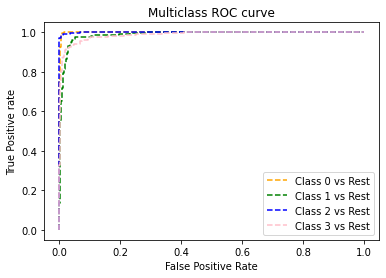

In [14]:
# Plotting ROC curves for all classes

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [15]:
# ROC AUC SCORE

ROC_AUC_Score = roc_auc_score(y_test, y1_pred_proba, multi_class='ovr', average='weighted')
print('ROC Score: ', round(ROC_AUC_Score, 3))

ROC Score:  0.994


# Bagging Classifier Algorithm

In [16]:
# Training bagging classifier - BaggingClassifier class of 'sklearn.ensemble' packages to build bagging classifier model.
# We set LogisticRegression as a base estimator and set 100 to the number of estimators, then train the model
# with train data.

# Training bagging classifier - BaggingClassifier class of 'sklearn.ensemble' packages to build bagging classifier model.
# We set LogisticRegression as a base estimator and set 100 to the number of estimators, then train the model
# with train data.

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='auto',
n_jobs=None, penalty='l2', random_state=None,
solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelBAG = BaggingClassifier(base_estimator=modelLR,
n_estimators=100, # number of LR models to create
max_samples=1.0, # each model is trained from randomly sampled 1 instance
max_features=1.0,
bootstrap=True, # set to False to use Pasting instead of Bagging
bootstrap_features=False,
oob_score=False,
warm_start=False,
n_jobs=None,
random_state=None,
verbose=0)

modelBAG.fit(x_train,y_train)

# Predict model with test data

y2_pred = modelBAG.predict(x_test)
y2_pred_proba = modelBAG.predict_proba(x_test)

In [17]:
# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

print(confusion_matrix(y2_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y2_pred

# Class = Label 0-3

lst_classes = [0, 1, 2, 3]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient


[[231   0   2   0]
 [  2 200   2  19]
 [  6   1 248   0]
 [  4  12   0 208]]
Print Class: 0
TP=231, FP=2, TN=690, FN=12
Accuracy: 0.985
Precision: 0.991
Sensitivity: 0.951
F1-Score: 0.971
Specificity: 0.997
Balanced Accuracy: 0.974
MCC: 0.961

Print Class: 1
TP=200, FP=23, TN=699, FN=13
Accuracy: 0.961
Precision: 0.897
Sensitivity: 0.939
F1-Score: 0.917
Specificity: 0.968
Balanced Accuracy: 0.954
MCC: 0.893

Print Class: 2
TP=248, FP=7, TN=676, FN=4
Accuracy: 0.988
Precision: 0.973
Sensitivity: 0.984
F1-Score: 0.978
Specificity: 0.99
Balanced Accuracy: 0.987
MCC: 0.97

Print Class: 3
TP=208, FP=16, TN=692, FN=19
Accuracy: 0.963
Precision: 0.929
Sensitivity: 0.916
F1-Score: 0.922
Specificity: 0.977
Balanced Accuracy: 0.946
MCC: 0.898



In [18]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall performace Prediction:")
print("Accuracy: {0}%".format(round(mean(model_acc)*100 , 4)))
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_f1score), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall performace Prediction:
Accuracy: 97.425%
Precision: 94.75%
Recall or Sensitivity: 94.75%
F1-Score: 0.9485
Specificity or True Nagative Rate: 98.3%
Balanced Accuracy: 96.525%

MCC: 0.9305



In [19]:
# Fit OneVsRestClassifier model to calculate the ROC SUC and plot ROC curve

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(BaggingClassifier(base_estimator=modelLR,
n_estimators=100, # number of LR models to create
max_samples=1.0, # each model is trained from randomly sampled 1 instance
max_features=1.0,
bootstrap=True, # set to False to use Pasting instead of Bagging
bootstrap_features=False,
oob_score=False,
warm_start=False,
n_jobs=None,
random_state=None,
verbose=0))

modelORC.fit(x_train, y_train)
y2_pred = modelORC.predict(x_test)
y2_pred_proba = modelORC.predict_proba(x_test)
print(y2_pred_proba)

[[9.93056399e-01 7.71377825e-05 2.93875766e-05 6.83707577e-03]
 [9.56669453e-01 4.72472713e-10 1.04432653e-02 3.28872810e-02]
 [3.86254978e-05 7.85184458e-02 2.43977132e-06 9.21440489e-01]
 ...
 [3.17343728e-01 6.80612112e-01 4.71517698e-04 1.57264259e-03]
 [9.94074027e-01 6.07318827e-04 5.20426844e-03 1.14386030e-04]
 [2.28502945e-05 2.26556117e-06 9.95029251e-01 4.94563358e-03]]


In [20]:
# ROC curve for multiple classes

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y2_pred_proba[:,i], pos_label=i)

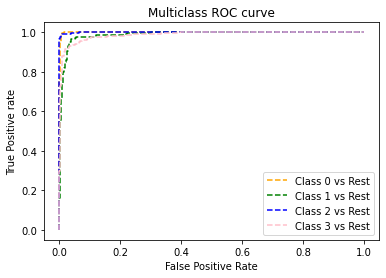

In [21]:
# Plotting ROC curves for all classes

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [22]:
# ROC AUC SCORE

ROC_AUC_Score = roc_auc_score(y_test, y2_pred_proba, multi_class='ovr', average='weighted')
print('ROC Score: ', round(ROC_AUC_Score, 3))

ROC Score:  0.994
